In [2]:
import pandas as pd
# hides Jupyter warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import geopandas

In [3]:
qk = geopandas.read_file("2.5_month.geojson")
qk.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,ci38600815,3.28,"14km NE of Coso Junction, CA",1563504733590,1563504868134,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",48.0,0.02262,0.18,51.0,ml,earthquake,"M 3.3 - 14km NE of Coso Junction, CA",POINT Z (-117.8280029 36.1238327 2.86)
1,ci38600727,2.58,"20km ESE of Little Lake, CA",1563503808010,1563504481630,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,",",focal-mechanism,geoserve,nearby-cities,origin...",33.0,0.08560,0.16,48.0,ml,earthquake,"M 2.6 - 20km ESE of Little Lake, CA",POINT Z (-117.697 35.8741667 7.5)
2,ci38600703,2.47,"20km W of Searles Valley, CA",1563503614080,1563503842559,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,",",geoserve,nearby-cities,origin,phase-data,scit...",26.0,0.02568,0.20,55.0,ml,earthquake,"M 2.5 - 20km W of Searles Valley, CA",POINT Z (-117.6225 35.8 7.25)
3,ci38600551,2.48,"18km NNE of Ridgecrest, CA",1563501912470,1563502558770,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",ci,",",focal-mechanism,geoserve,nearby-cities,origin...",34.0,0.04062,0.16,60.0,ml,earthquake,"M 2.5 - 18km NNE of Ridgecrest, CA",POINT Z (-117.6221667 35.7803333 9.83)
4,pr2019200000,2.86,"98km NNW of Road Town, British Virgin Islands",1563500165820,1563502053040,-240,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",pr,us,",",geoserve,origin,phase-data,",9.0,1.44260,0.35,339.0,md,earthquake,"M 2.9 - 98km NNW of Road Town, British Virgin ...",POINT Z (-64.92059999999999 19.2465 35)


In [4]:
qk['lat'] = qk['geometry'].x
qk['lon'] = qk['geometry'].y
qk.drop(columns=['id', 'place', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type', 'title', 'mmi', 'tsunami', 'sig'], inplace=True)
qk.describe()

,mag,time,lat,lon
count,3121.000000,3.121000e+03,3121.000000,3121.000000
mean,3.416299,1.562356e+12,-77.483818,28.437893
std,0.885153,5.864361e+08,94.976932,22.270805
min,2.450000,1.560917e+12,-179.963100,-63.118100
25%,2.690000,1.562168e+12,-117.726997,19.757600
50%,3.080000,1.562410e+12,-117.557667,35.724000
75%,4.200000,1.562683e+12,-80.385300,35.928833
max,7.300000,1.563505e+12,179.945800,84.464200


In [5]:
qk_ridgecrest = qk[(qk.geometry.x < -116.4) & (qk.geometry.y > 35.0)].loc[(qk.geometry.x > -118.67) & (qk.geometry.y < 36.4)]
qk_ridgecrest.describe()

,mag,time,lat,lon
count,1725.000000,1.725000e+03,1725.000000,1725.000000
mean,2.979113,1.562578e+12,-117.614638,35.805390
std,0.501325,2.946445e+08,0.137162,0.155358
min,2.450000,1.562260e+12,-117.975833,35.335499
25%,2.610000,1.562396e+12,-117.710503,35.676666
50%,2.810000,1.562443e+12,-117.607833,35.792499
75%,3.240000,1.562709e+12,-117.514831,35.902332
max,7.100000,1.563505e+12,-117.273003,36.221500


In [15]:
# 'LINESTRING(-117.90551869 36.13485794, -117.32375728 35.47592193)',
# 'LINESTRING(-117.90551869 35.47592193, -117.32375728 36.13485794)',

In [6]:
df = pd.DataFrame(qk_ridgecrest)
df.describe()

,mag,time,lat,lon
count,1725.000000,1.725000e+03,1725.000000,1725.000000
mean,2.979113,1.562578e+12,-117.614638,35.805390
std,0.501325,2.946445e+08,0.137162,0.155358
min,2.450000,1.562260e+12,-117.975833,35.335499
25%,2.610000,1.562396e+12,-117.710503,35.676666
50%,2.810000,1.562443e+12,-117.607833,35.792499
75%,3.240000,1.562709e+12,-117.514831,35.902332
max,7.100000,1.563505e+12,-117.273003,36.221500


In [7]:
df.dtypes
df.columns

Index(['mag', 'time', 'alert', 'status', 'net', 'code', 'ids', 'geometry',
       'lat', 'lon'],
      dtype='object')

In [8]:
df.drop(columns=['alert', 'status', 'net', 'code', 'ids', 'geometry'], inplace=True)

In [26]:
df.to_json(r'quake.json', orient='split')

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

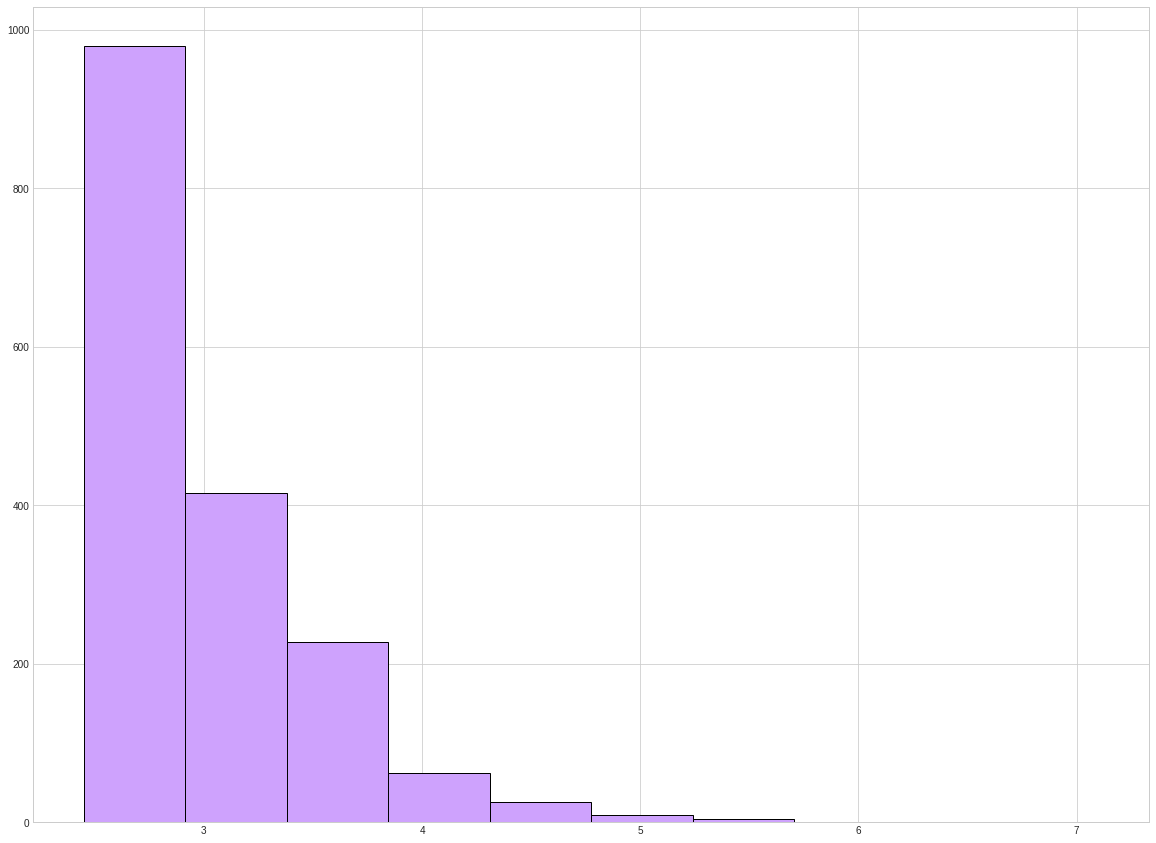

In [11]:
fig, ax = plt.subplots(1, figsize=(20,15))
ax.hist(df['mag'], color='xkcd:lilac', edgecolor='black')
plt.show()